# D214 Capstone
# Modeling Inflation Adusted Recessionary Lumber Prices
# January 1980- July 1980 Recession
## Eric Yarger

# Import Packages

In [1]:
# Import Initial Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import statsmodels
import datetime
import platform
from pmdarima.arima import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
from scipy import signal
from pmdarima.arima import StepwiseContext
from pmdarima.arima import auto_arima
from pmdarima.model_selection import train_test_split

### Environment

In [2]:
# Windows 10, Anaconda, JupyterLab, JupyterNotebook
# Jupyter environment version
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : not installed
jupyter_client   : 7.3.5
jupyter_core     : 4.10.0
jupyter_server   : 1.18.1
jupyterlab       : 3.4.4
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.5.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.1.1


In [3]:
# Python Version
print(platform.python_version())

3.7.13


In [4]:
#Load Medical Dataset 
df = pd.read_csv('C:/Users/ericy/Desktop/lumber_trading_days_adj.csv')

# November 16 1973 to March 31, 1975

In [5]:
#------ Select Data Set for Recession
df = df[1288:1937]

In [6]:
df

,Date,Trading Days,2022_Value,Value
1288,1978-01-05,1289,965.967,216.1
1289,1978-01-06,1290,958.368,214.4
1290,1978-01-09,1291,936.018,209.4
1291,1978-01-10,1292,923.502,206.6
1292,1978-01-11,1293,928.866,207.8
...,...,...,...,...
1932,1980-07-28,1933,784.046,210.2
1933,1980-07-29,1934,801.950,215.0
1934,1980-07-30,1935,783.300,210.0
1935,1980-07-31,1936,764.650,205.0


# D1: Exploratory Data Analysis

In [7]:
df = df[['Trading Days','2022_Value']]

In [8]:
df

,Trading Days,2022_Value
1288,1289,965.967
1289,1290,958.368
1290,1291,936.018
1291,1292,923.502
1292,1293,928.866
...,...,...
1932,1933,784.046
1933,1934,801.950
1934,1935,783.300
1935,1936,764.650


# EDA

In [9]:
df.head()

,Trading Days,2022_Value
1288,1289,965.967
1289,1290,958.368
1290,1291,936.018
1291,1292,923.502
1292,1293,928.866


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 1288 to 1936
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trading Days  649 non-null    int64  
 1   2022_Value    649 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.3 KB


In [11]:
df.shape

(649, 2)

In [12]:
df.describe()

,Trading Days,2022_Value
count,649.000000,649.000000
mean,1613.000000,905.570802
std,187.494444,106.342252
min,1289.000000,579.642000
25%,1451.000000,878.788000
50%,1613.000000,926.695000
75%,1775.000000,961.944000
max,1937.000000,1182.335000


In [13]:
df.isnull().any()

Trading Days    False
2022_Value      False
dtype: bool

## Line Graph Visualization

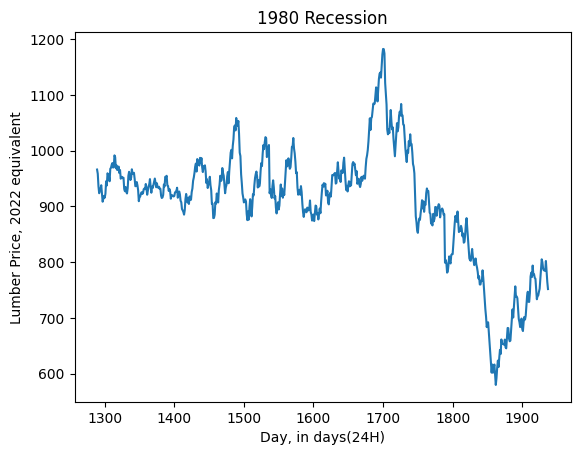

In [14]:
#-------
plt.plot(df['Trading Days'],df['2022_Value'])
plt.title('1980 Recession')
plt.xlabel('Day, in days(24H)')
plt.ylabel('Lumber Price, 2022 equivalent')
plt.show()

# Data Cleaning

In [15]:
# Drop any null columns
df = df.dropna()

# D2: Time Step Formatting, Indexing


### Set df['Trading Days'] to Index

In [16]:
# Day to datetime
df['Trading Days'] = pd.to_datetime(df['Trading Days'], unit='D')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 1288 to 1936
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Trading Days  649 non-null    datetime64[ns]
 1   2022_Value    649 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.2 KB


In [18]:
# Set Day as Index
df.set_index('Trading Days',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 649 entries, 1973-07-13 to 1975-04-22
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2022_Value  649 non-null    float64
dtypes: float64(1)
memory usage: 10.1 KB


In [20]:
df

,2022_Value
Trading Days,
1973-07-13,965.967
1973-07-14,958.368
1973-07-15,936.018
1973-07-16,923.502
1973-07-17,928.866
...,...
1975-04-18,784.046
1975-04-19,801.950
1975-04-20,783.300


# D3: Stationarity Analysis



### Augmented Dickey Fuller (ADF) Test
### Assess stationarity of dataset

In [21]:
# Code Reference (Making time series stationary | Python, n.d.)
dicky_fuller_test = adfuller(df)

In [22]:
dicky_fuller_test

(-1.8123856973437957,
 0.3743301074911876,
 3,
 645,
 {'1%': -3.4405290941696722,
  '5%': -2.8660314117601575,
  '10%': -2.569161868277147},
 5094.404131203963)

In [23]:
# Results show p = .37433
# Data does not reject null hypothesis at p < .05
# Therefore, Time series is determined to be non-stationary

# D4 Differencing
## 1st and 2nd order Differencing
### finding 'd' for ARIMA model

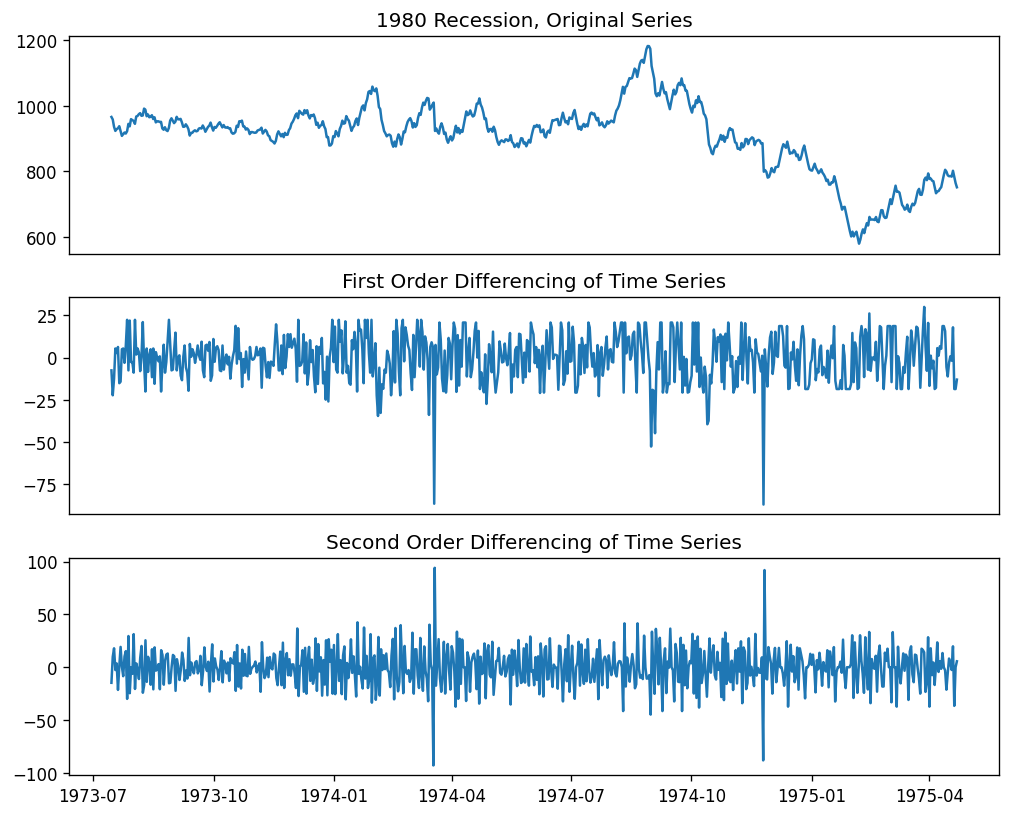

In [24]:
# Set plot parameters for multi-ax subplots
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})
 
# Establish that there are three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plot the original dataset 
ax1.plot(df); ax1.set_title('1980 Recession, Original Series'); ax1.axes.xaxis.set_visible(False)

# First Order differencing of Time Series 
ax2.plot(df.diff()); ax2.set_title('First Order Differencing of Time Series'); ax2.axes.xaxis.set_visible(False)

# Second Order Differencing of Time Series
ax3.plot(df.diff().diff()); ax3.set_title('Second Order Differencing of Time Series')

# Plot all three graphs
plt.show()

In [25]:
# Using pmdarima's ndiffs to find differencing term
# Code reference (Verma, 2021)

kpss_diffs = ndiffs(df, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 1


# D5 Seasonality Analysis

In [26]:
# Code Reference (Boston, 2020)
result = seasonal_decompose(df)

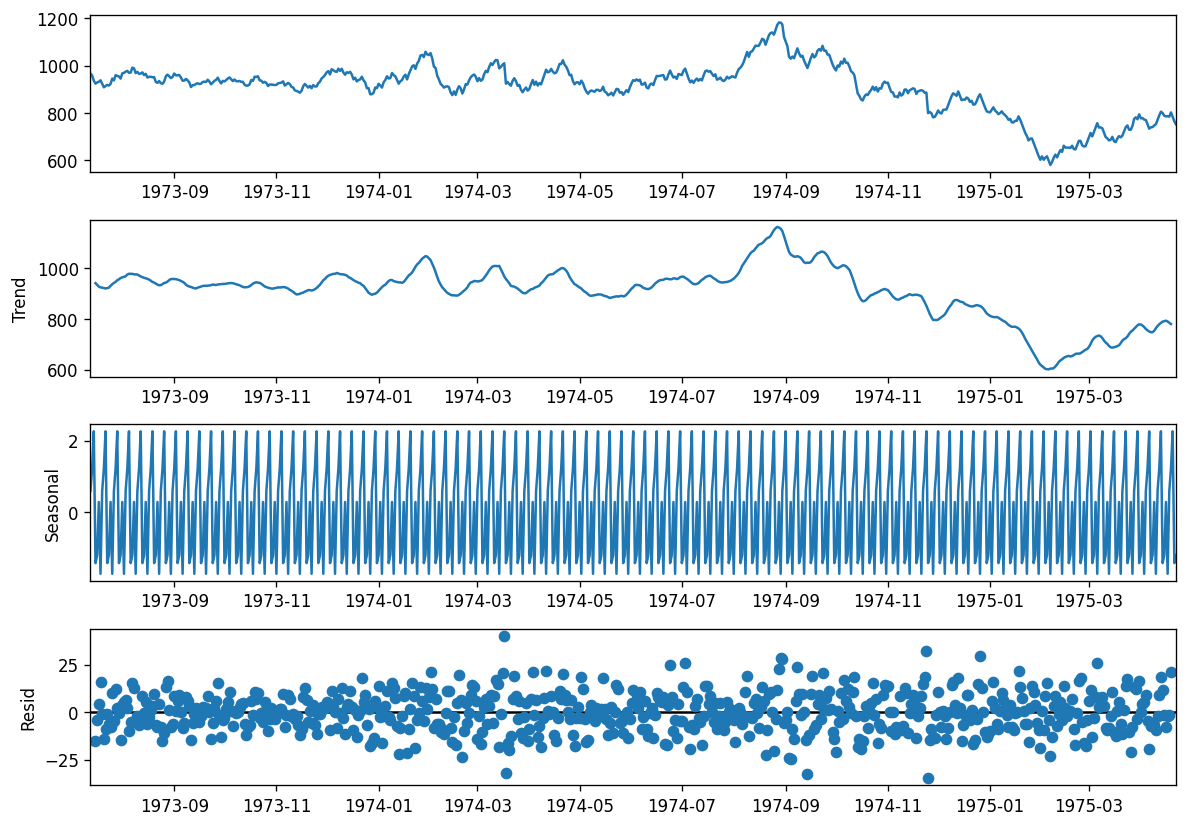

In [27]:
# plotting the result of our seasonal decomposition from the step above
rcParams['figure.figsize'] = 10,7
result.plot();

# D6 ACF and PACF

## Finding order of MA term 'q'
### Using Autocorrelation function (ACF)

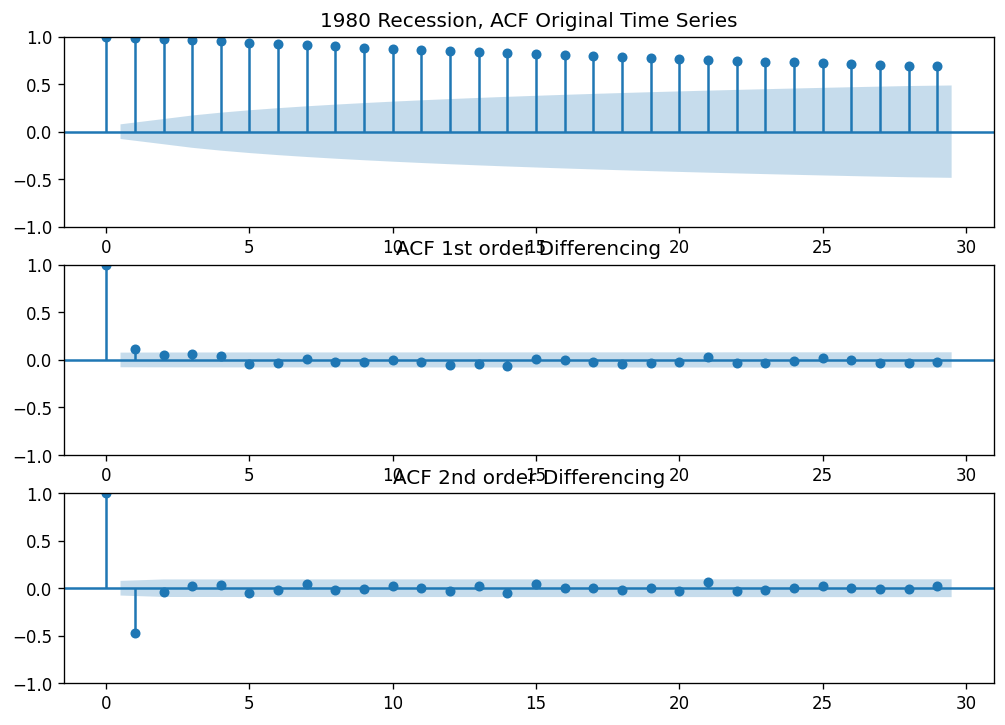

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df, ax=ax1, title='1980 Recession, ACF Original Time Series');
plot_acf(df.diff().dropna(), ax=ax2, title='ACF 1st order Differencing');
plot_acf(df.diff().diff().dropna(), ax=ax3, title='ACF 2nd order Differencing');

## Finding order of AR term 'p'
### Using Partial autocorrelation (PACF)

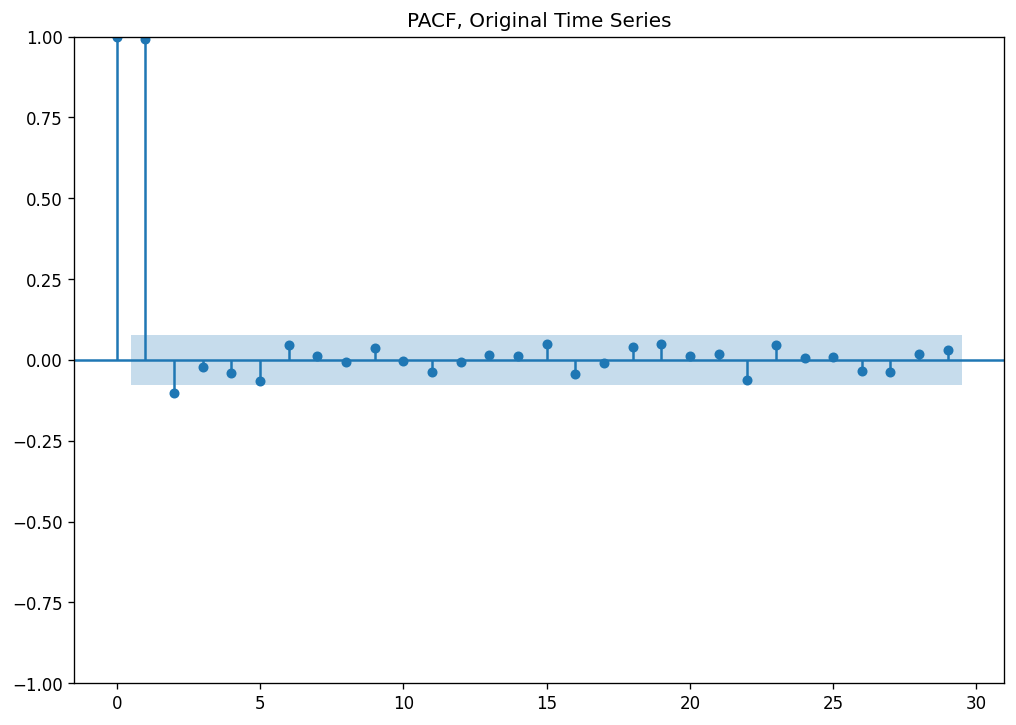

In [29]:
warnings.filterwarnings("ignore")
plot_pacf(df.dropna(), title='PACF, Original Time Series');

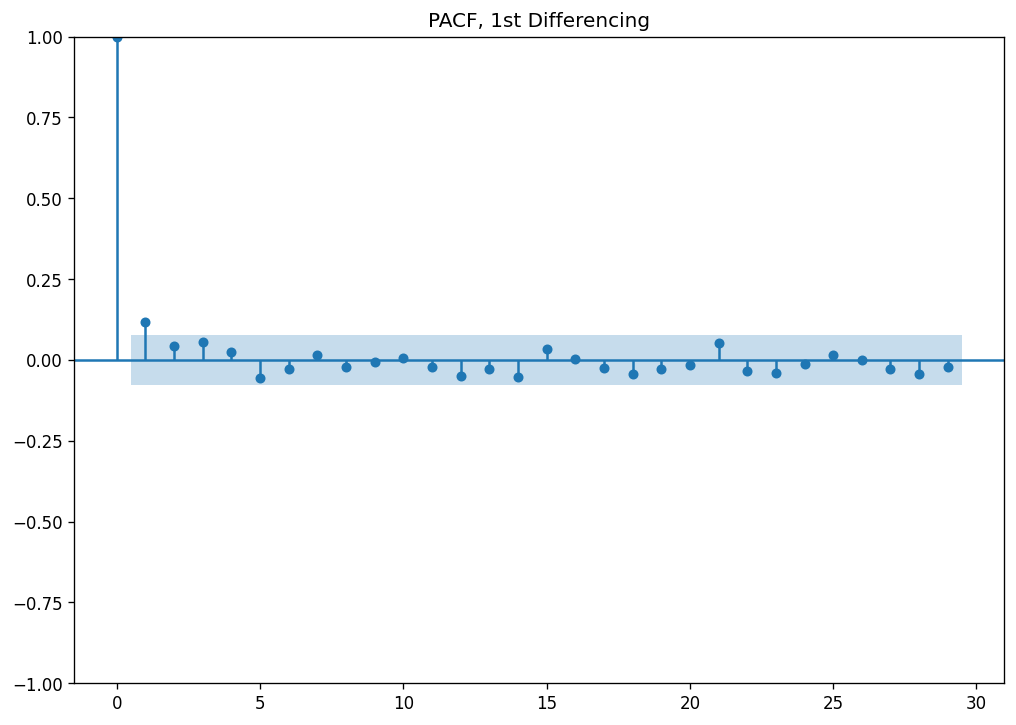

In [30]:
plot_pacf(df.diff().dropna(), title='PACF, 1st Differencing');

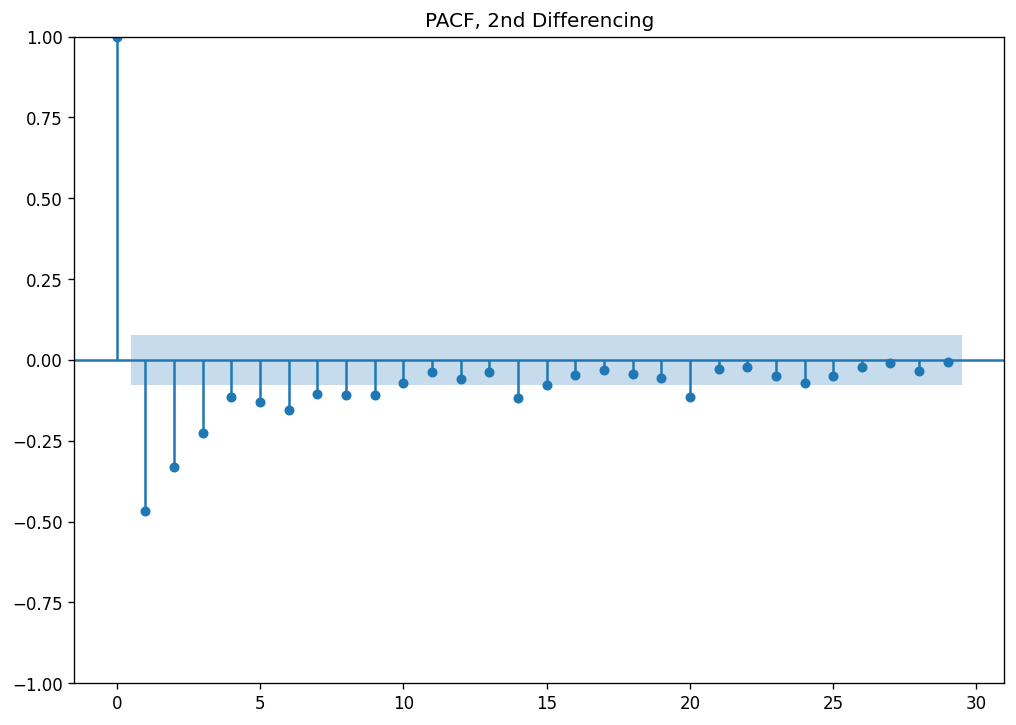

In [31]:
plot_pacf(df.diff().diff().dropna(), title='PACF, 2nd Differencing');

# D7 Spectral Density

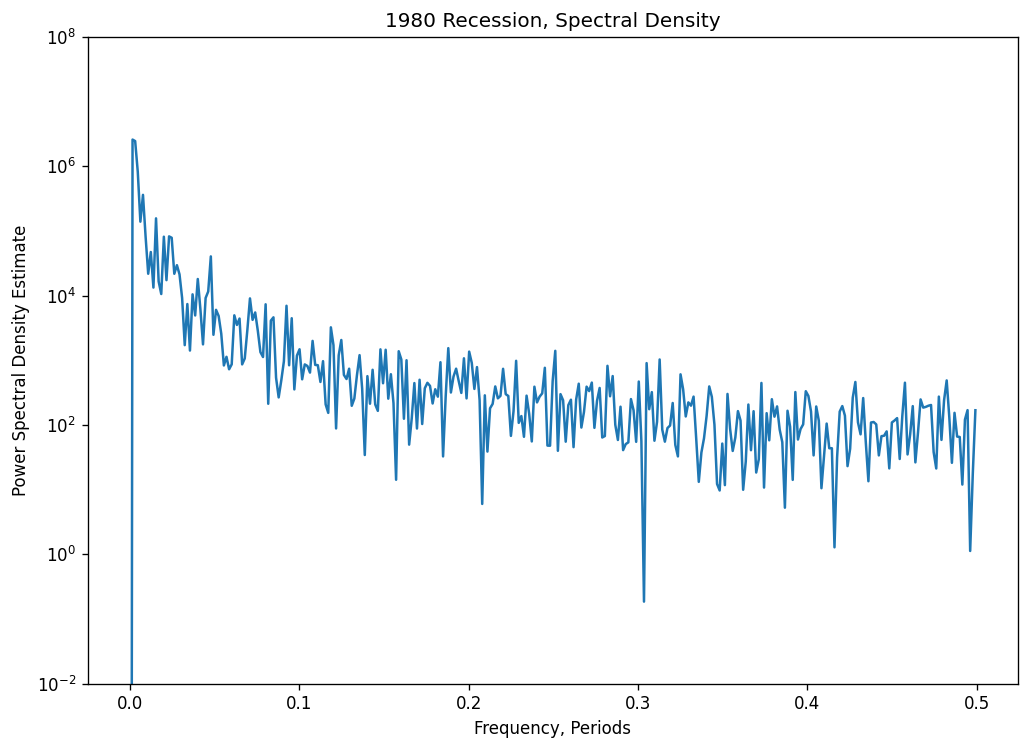

In [32]:
# Code Reference (Festus, 2022)

# signal periodogram
f, Pxx_den = signal.periodogram(df['2022_Value'])

# plotting semilogy - pyplot module used to make a plot with log scaling on the y-axis
plt.semilogy(f, Pxx_den)

# Setting coordinate values and titles for Spectral Density Graph
# setting y-axis min and max value
plt.ylim(1e-2, 1e8)

# Graph Title
plt.title('1980 Recession, Spectral Density')

# X label for Periods
plt.xlabel('Frequency, Periods')

# Y Label for SD Estimate
plt.ylabel('Power Spectral Density Estimate')
plt.show()

# D8 Create Train/Test Datasets

## Dataset Size = 649 cases
## 80/20 Train/Test Split
## Split is 519 / 130

In [33]:
# ------Splitting data into Test and Train sets using pmdarima's train_test_split
# code reference (Smith, 2019)

train, test = train_test_split(df, train_size=519)

In [34]:
train

,2022_Value
Trading Days,
1973-07-13,965.967
1973-07-14,958.368
1973-07-15,936.018
1973-07-16,923.502
1973-07-17,928.866
...,...
1974-12-09,870.209
1974-12-10,882.891
1974-12-11,878.042


In [35]:
test

,2022_Value
Trading Days,
1974-12-14,872.074
1974-12-15,853.797
1974-12-16,856.781
1974-12-17,855.662
1974-12-18,864.987
...,...
1975-04-18,784.046
1975-04-19,801.950
1975-04-20,783.300


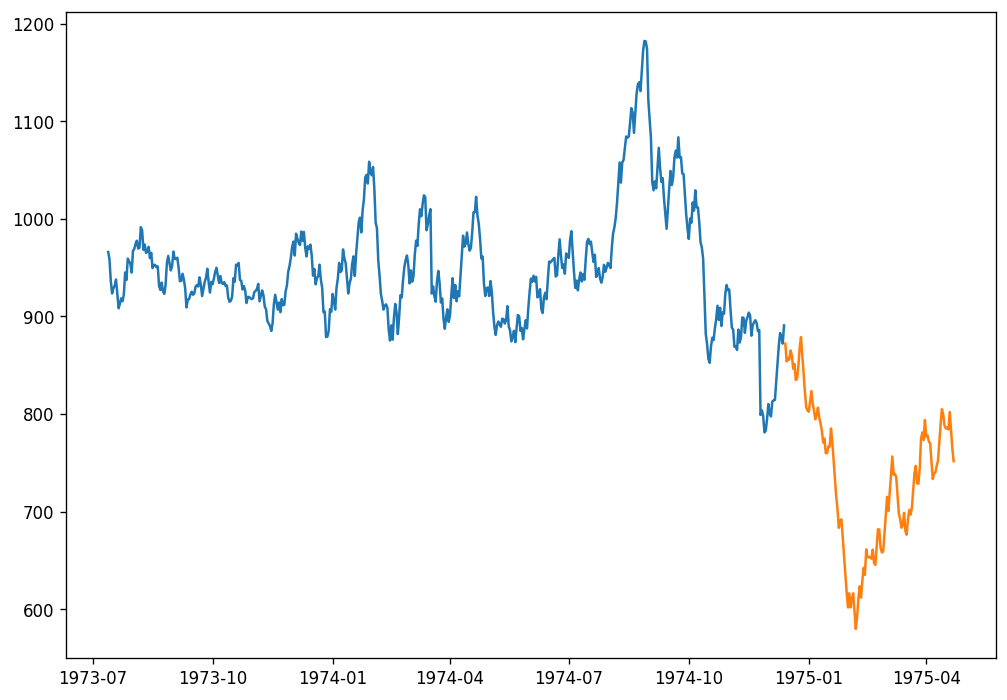

In [36]:
# Plot training data
plt.plot(train)

# Plot Test Data
plt.plot(test)

In [37]:
print(train.shape)
print(test.shape)

(519, 1)
(130, 1)


# D9 Auto-arima ARIMA Modeling
## Using pmdarima's auto_arima

In [38]:
# Fit the model using auto_arima
# Auto-arima code reference (6. Tips to using auto_arima — pmdarima 2.0.1 documentation, n.d.)
# Additional code reference (Pmdarima.arima.AutoARIMA — pmdarima 2.0.1 documentation, n.d.)
# Auto-arima, initial parameter attempt
# Code Reference (Kosaka, 2021)

# Establish auto_arima to run ARIMA and take into account
# Any Seasonality of the data, and any trends found.
model = auto_arima(train, start_p=1, start_q=1,
                   test='adf',
                   max_p=3,
                   max_q=3,
                   max_d=3,
                   seasonal=True,
                   stationarity=False,
                   seasonal_test='ocsb',
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                  trend='c')

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4214.746, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4217.906, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4215.865, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4216.276, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4217.906, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4216.346, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4216.228, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4216.925, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4216.050, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4214.481, Time=0.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4215.432, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4215.357, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4215.983, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4216.812, Time=0.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept

In [68]:
model = auto_arima(train, trace=True)

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5740.844, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4223.447, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5176.914, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8591.962, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4219.902, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4218.827, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=4215.972, Time=0.20 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=4215.885, Time=0.24 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=4217.242, Time=0.82 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=4217.384, Time=0.42 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0] intercept
Total fit time: 2.961 seconds
                               SARIMAX Results                                
Dep. Variable:     

In [40]:
model.conf_int()

,0,1
intercept,18.361481,51.363647
ar.L1,0.958992,1.144856
ar.L2,-0.159404,0.117056
ar.L3,-0.118257,0.167266
ar.L4,-0.148988,0.089742
ar.L5,-0.136433,0.011571
sigma2,177.148006,205.530352


# Visualizing Model Results

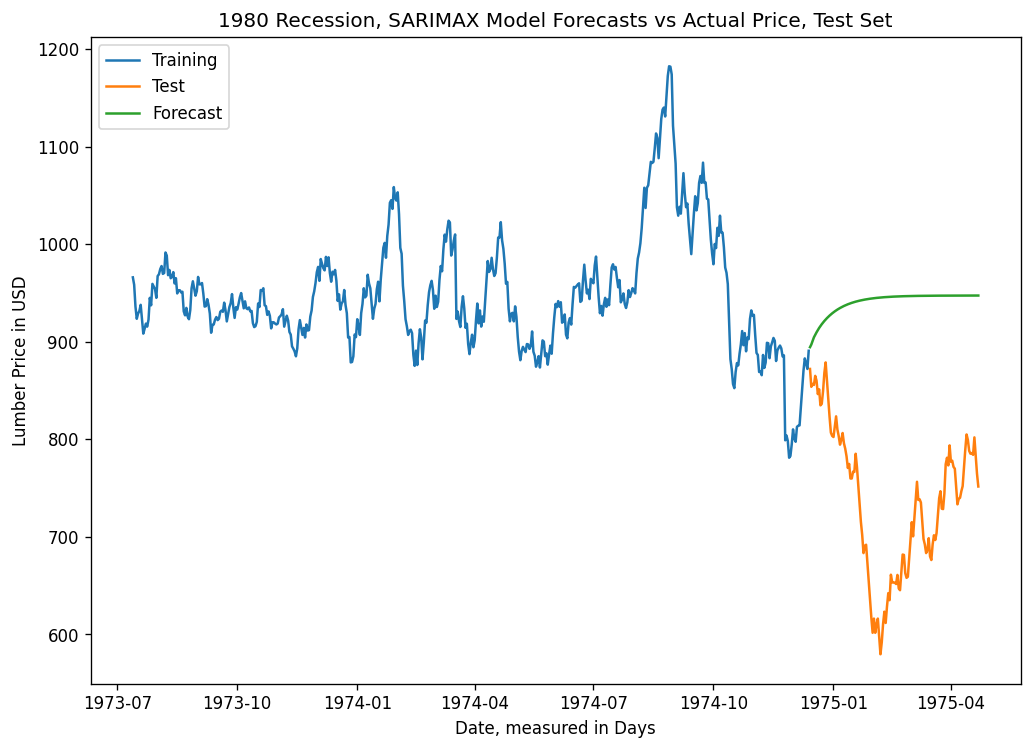

In [41]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# ------Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 130))

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date, measured in Days')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('1980 Recession, SARIMAX Model Forecasts vs Actual Price, Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')

# Show Plot
plt.show()

In [42]:
forecast

,forecast_prices
1974-12-14,894.404920
1974-12-15,897.087718
1974-12-16,900.768410
1974-12-17,904.493727
1974-12-18,907.126901
...,...
1975-04-18,947.323270
1975-04-19,947.325035
1975-04-20,947.326699
1975-04-21,947.328267


# D10 Accuracy Metrics for our forecast

In [43]:
# RMSE and MAE to test model accuracy

In [44]:
# Create array of actual Revenue values, stored in Test variable

test_array = test[['2022_Value']].to_numpy()
#test_array

In [45]:
test_array.shape

(130, 1)

In [46]:
forecast

,forecast_prices
1974-12-14,894.404920
1974-12-15,897.087718
1974-12-16,900.768410
1974-12-17,904.493727
1974-12-18,907.126901
...,...
1975-04-18,947.323270
1975-04-19,947.325035
1975-04-20,947.326699
1975-04-21,947.328267


In [47]:
# Predictions to numpy array
predicted_array = forecast[['forecast_prices']].to_numpy()

In [48]:
predicted_array.shape

(130, 1)

In [49]:
#RMSE Calculation

rmse = sqrt(mean_squared_error(test_array, predicted_array))
print ('RMSE = ' + str(rmse))

RMSE = 220.77337542916757


In [50]:
# MAE Calculation

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_array
predicted = predicted_array

print(mae(true, predicted))

204.95296677080003


# D11 Visualizing Model Forecast Confidence Intervals at 20% CI# Visualizing Model Forecasts

In [51]:
# Model Standard Error calculations, computed numerical Hessian

std_error = model.bse()
print(std_error)

intercept    8.419074
ar.L1        0.047415
ar.L2        0.070527
ar.L3        0.072839
ar.L4        0.060901
ar.L5        0.037757
sigma2       7.240527
dtype: float64


In [52]:
# Generate Model confidence intervals

conf_int = model.conf_int()

In [53]:
# ------Generate Forecast Prediction Intervals at 90% Confidence

y_forec, conf_int = model.predict(130, return_conf_int=True, alpha=0.8)
print(conf_int)

[[890.90048613 897.9093543 ]
 [892.00140503 902.17403169]
 [894.41718988 907.1196302 ]
 [896.983104   912.00434914]
 [898.55899009 915.69481269]
 [900.13579084 919.06188457]
 [901.72514751 922.19112259]
 [903.21139341 925.01255612]
 [904.59967074 927.55570808]
 [905.94311101 929.89701096]
 [907.23542315 932.05465043]
 [908.47195647 934.04332633]
 [909.65678252 935.88302379]
 [910.7927403  937.590286  ]
 [911.87983665 939.17679043]
 [912.91888375 940.6531547 ]
 [913.91117651 942.02899471]
 [914.85788783 943.31258319]
 [915.76019962 944.51116714]
 [916.61944688 945.63127751]
 [917.43704029 946.67879413]
 [918.21442592 947.65901904]
 [918.95308448 948.57676903]
 [919.65451934 949.43644172]
 [920.32023802 950.24206194]
 [920.95174028 950.99732389]
 [921.55050927 951.70562767]
 [922.11800341 952.37010928]
 [922.65564965 952.99366635]
 [923.16483856 953.57898057]
 [923.64692052 954.12853735]
 [924.10320288 954.64464307]
 [924.53494804 955.12944035]
 [924.9433722  955.58492165]
 [925.32964469

In [54]:
# Assign Predictions to pandas DataFrame

conf_pd = pd.DataFrame(conf_int, columns =['Low_Prediction','High_Prediction'])

#Assign Low predictions to variable
low_prediction = conf_pd['Low_Prediction']

#Assign High predictions to variable
high_prediction = conf_pd['High_Prediction']

In [55]:
# Read out Test and Train sets to csv file
# Open csv files in Google Sheets, Add Day Column
# Dates align with 'test' variable, which contains actual revenue figures

low_prediction.to_csv('C:/Users/ericy/Desktop/Low_Prediction.csv')
high_prediction.to_csv('C:/Users/ericy/Desktop/High_Prediction.csv')

In [56]:
#-----Load predictions, date column added

low_pred = pd.read_csv('C:/Users/ericy/Desktop/1980Low_Prediction.csv')
high_pred = pd.read_csv('C:/Users/ericy/Desktop/1980High_Prediction.csv')

In [57]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
low_pred

,Date,Low_Prediction
0,1974-12-14,890.900486
1,1974-12-15,892.001405
2,1974-12-16,894.417190
3,1974-12-17,896.983104
4,1974-12-18,898.558990
...,...,...
125,1975-04-18,931.816385
126,1975-04-19,931.818149
127,1975-04-20,931.819813
128,1975-04-21,931.821381


In [58]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
high_pred

,Date,High_Prediction
0,1974-12-14,897.909354
1,1974-12-15,902.174032
2,1974-12-16,907.119630
3,1974-12-17,912.004349
4,1974-12-18,915.694813
...,...,...
125,1975-04-18,962.830156
126,1975-04-19,962.831922
127,1975-04-20,962.833586
128,1975-04-21,962.835154


## Convert Low and High Prediction 'Day' column to datetime and index

In [59]:
# Lower Predictions, Set Day as Index
low_pred['Date'] = pd.to_datetime(low_pred['Date'])

In [60]:
low_pred.set_index('Date',inplace=True)

In [61]:
# High Predictions, Day to datetime
high_pred['Date'] = pd.to_datetime(high_pred['Date'])

In [62]:
# High Predictions, Set Day as Index
high_pred.set_index('Date',inplace=True)

In [63]:
low_pred

,Low_Prediction
Date,
1974-12-14,890.900486
1974-12-15,892.001405
1974-12-16,894.417190
1974-12-17,896.983104
1974-12-18,898.558990
...,...
1975-04-18,931.816385
1975-04-19,931.818149
1975-04-20,931.819813


In [64]:
high_pred

,High_Prediction
Date,
1974-12-14,897.909354
1974-12-15,902.174032
1974-12-16,907.119630
1974-12-17,912.004349
1974-12-18,915.694813
...,...
1975-04-18,962.830156
1975-04-19,962.831922
1975-04-20,962.833586


# SARIMAX Model Forecast, With Confidence Interval = 20%, Vs Test Set

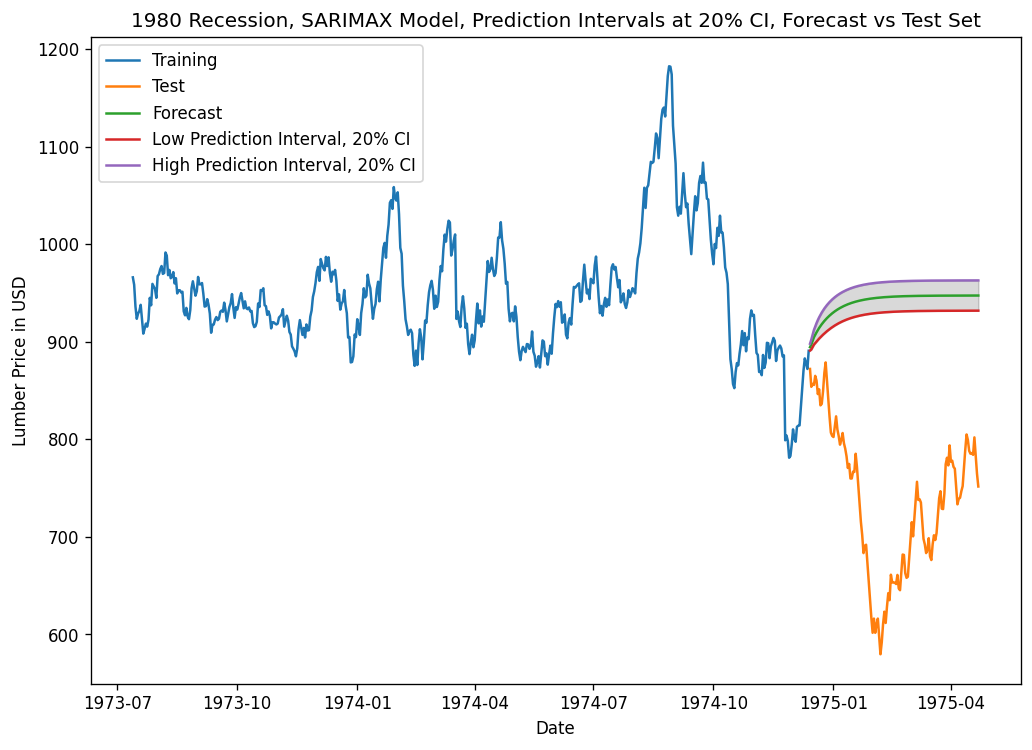

In [65]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# -----Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 130),index=test.index)

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('1980 Recession, SARIMAX Model, Prediction Intervals at 20% CI, Forecast vs Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Add Prediction Interval at 95% CI
plt.plot(low_pred,label='Low Prediction Interval, 20% CI')
plt.plot(high_pred,label='High Prediction Interval, 20% CI')
plt.fill_between(low_pred.index, low_pred['Low_Prediction'], high_pred['High_Prediction'], color='k', alpha=.15)

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')


# Show Plot
plt.show()

# Is the null hypothesis Accepted or Rejected?

In [66]:
# Accept or reject the Null Hypothesis
# 1980 Recession we Accept the Null Hypothesis